# 1. Importações

In [ ]:
import numpy as np 
import pandas as pd 
# data visualization
from matplotlib import pyplot as plt 
from math import sqrt

# 2. Leitura do dado

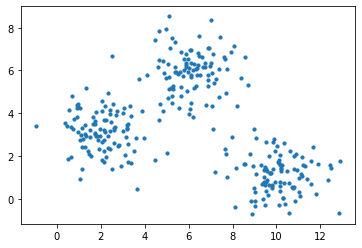

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/[2020.1] APRENDIZADO DE MÁQUINA/TRABALHO/03. Códigos/Notebooks com os algoritmos/08 - KMeans/dataset.csv', header=None)
dataset = np.array(dataset)

plt.scatter(dataset[:,0], dataset[:,1], s=10)
plt.show()

# 3. Definição da classe do classificador KMeans

In [ ]:
class KMeans():
    
    def __init__(self, n_clusters=8, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def calculate_initial_centers(self, dataset, k):
        """
        Inicializa os centróides iniciais de maneira arbitrária 
        
        Argumentos:
        dataset -- Conjunto de dados - [m,n]
        k -- Número de centróides desejados
        
        Retornos:
        centroids -- Lista com os centróides calculados - [k,n]
        """
        centroids = []
        n = dataset.shape[1]
        minimos = np.min(dataset,  axis = 0)
        maximos = np.max(dataset, axis = 0)
        for i in range(k):
            centroids.append(np.random.uniform(minimos, maximos, n))
        return np.array(centroids)

    def euclidian_distance(self, a, b):
        """
        Calcula a distância euclidiana entre os pontos a e b
        
        Argumentos:
        a -- Um ponto no espaço - [1,n]
        b -- Um ponto no espaço - [1,n]
        
        Retornos:
        distance -- Distância euclidiana entre os pontos
        """
        return sqrt(np.sum([(i - j)**2 for i, j in zip(a,b)]))

    def nearest_centroid(self, a, centroids):
        """
        Calcula o índice do centroid mais próximo ao ponto a
        
        Argumentos:
        a -- Um ponto no espaço - [1,n]
        centroids -- Lista com os centróides - [k,n]
        
        Retornos:
        nearest_index -- Índice do centróide mais próximo
        """
        dist = [self.euclidian_distance(a, centro) for centro in centroids]
        for i in range(0, len(dist)):
            if dist[i] == min(dist):
                nearest_index = i
                break
        return nearest_index

    def all_nearest_centroids(self, dataset, centroids):
        """
        Calcula o índice do centroid mais próximo para cada 
        ponto do dataset
        
        Argumentos:
        dataset -- Conjunto de dados - [m,n]
        centroids -- Lista com os centróides - [k,n]
        
        Retornos:
        nearest_indexes -- Índices do centróides mais próximos - [m,1]
        """
        nearest_indexes = []
        for row in dataset:
            nearest_indexes.append(self.nearest_centroid(row, centroids))
        return np.array(nearest_indexes)

    def inertia(self, dataset, centroids, nearest_indexes):
        """
        Soma das distâncias quadradas das amostras para o 
        centro do cluster mais próximo.
        
        Argumentos:
        dataset -- Conjunto de dados - [m,n]
        centroids -- Lista com os centróides - [k,n]
        nearest_indexes -- Índices do centróides mais próximos - [m,1]
        
        Retornos:
        inertia -- Soma total do quadrado da distância entre 
        os dados de um cluster e seu centróide
        """
        inertia = np.sum([self.euclidian_distance(dataset[i], centroids[nearest_indexes[i]])**2 for i in range(0, len(dataset))])  
        return inertia

    def update_centroids(self, dataset, centroids, nearest_indexes):
        """
        Atualiza os centroids
        
        Argumentos:
        dataset -- Conjunto de dados - [m,n]
        centroids -- Lista com os centróides - [k,n]
        nearest_indexes -- Índices do centróides mais próximos - [m,1]
        
        Retornos:
        centroids -- Lista com centróides atualizados - [k,n]
        """
        dimensao = len(np.unique(nearest_indexes))
        soma = np.zeros((dimensao, dataset.shape[1]))
        total = np.zeros(dimensao)
        for i in range(0, len(dataset)):
            soma[nearest_indexes[i]] += dataset[i]
            total[nearest_indexes[i]] += 1
        
        centroids = [soma[i]/total[i] for i in range(0, dimensao)]
        
        return np.array(centroids)

    def fit(self,X):
        # Inicializa os centróides
        self.cluster_centers_ = self.calculate_initial_centers(X, self.n_clusters)

        # Computa o cluster de cada amostra
        self.labels_ = self.all_nearest_centroids(X, self.cluster_centers_)
        
        # Calcula a inércia inicial
        old_inertia = self.inertia(X, self.cluster_centers_, self.labels_)
        
        for index in range(0, self.max_iter):
            self.cluster_centers_ = self.update_centroids(X, self.n_clusters, self.labels_)
            self.labels_ = self.all_nearest_centroids(X, self.cluster_centers_)
            self.inertia_ = self.inertia(X, self.cluster_centers_, self.labels_)
            if(old_inertia == self.inertia_):
                break
            else:
                old_inertia = self.inertia_
                    
        return self
    
    def predict(self, X):
        return self.all_nearest_centroids(X, self.cluster_centers_)


# 4. Exemplo de aplicação do algoritmo

Inércia =  608.6035508327782


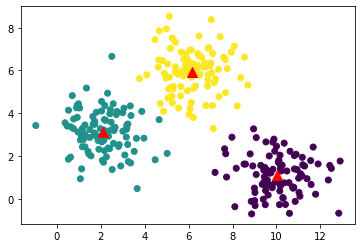

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(dataset)
centroids = kmeans.cluster_centers_

print("Inércia = ", kmeans.inertia_)

plt.scatter(dataset[:,0], dataset[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], 
            kmeans.cluster_centers_[:,1], marker='^', c='red', s=100)
plt.show()

In [ ]:
kmeans.predict(dataset)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# 5. Demais testes (lixo)

## Centróides

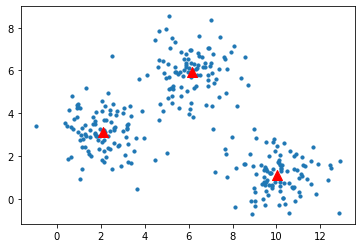

In [ ]:
plt.scatter(dataset[:,0], dataset[:,1], s=10)
plt.scatter(centroids[:,0], centroids[:,1], marker='^', c='red',s=100)
plt.show()

## Testando distâncias

In [ ]:
a = np.array([1, 5, 9])
b = np.array([3, 7, 8])

if (kmeans.euclidian_distance(a,b) == 3):
    print("Distância calculada corretamente!")
else:
    print("Função de distância incorreta")

Distância calculada corretamente!


## Testando Nearest Centroid

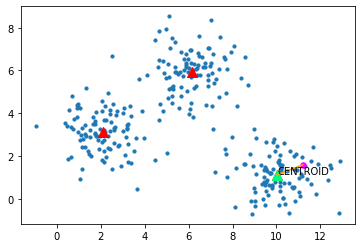

In [ ]:
# Seleciona um ponto aleatório no dataset
index = np.random.randint(dataset.shape[0])
a = dataset[index,:]

# Usa a função para descobrir o centroid mais próximo
idx_nearest_centroid = kmeans.nearest_centroid(a, centroids)


# Plota os dados ------------------------------------------------
plt.scatter(dataset[:,0], dataset[:,1], s=10)
# Plota o ponto aleatório escolhido em uma cor diferente
plt.scatter(a[0], a[1], c='magenta', s=30)

# Plota os centroids
plt.scatter(centroids[:,0], centroids[:,1], marker='^', c='red', s=100)
# Plota o centroid mais próximo com uma cor diferente
plt.scatter(centroids[idx_nearest_centroid,0], 
            centroids[idx_nearest_centroid,1],
            marker='^', c='springgreen', s=100)

# Cria uma linha do ponto escolhido para o centroid selecionado
plt.plot([a[0], centroids[idx_nearest_centroid,0]], 
         [a[1], centroids[idx_nearest_centroid,1]],c='orange')
plt.annotate('CENTROID', (centroids[idx_nearest_centroid,0], 
            centroids[idx_nearest_centroid,1],))
plt.show()

## Testando All Nearest Centroids

In [ ]:
nearest_indexes = kmeans.all_nearest_centroids(dataset, centroids)

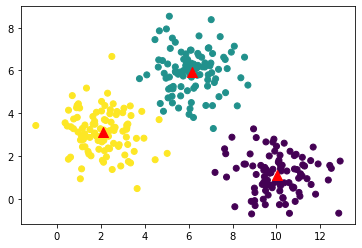

In [ ]:
plt.scatter(dataset[:,0], dataset[:,1], c=nearest_indexes)
plt.scatter(centroids[:,0], centroids[:,1], marker='^', c='red', s=100)
plt.show()

## Teste da Inértia

In [ ]:
tmp_data = np.array([[1,2,3],[3,6,5],[4,5,6]])
tmp_centroide = np.array([[2,3,4]])

tmp_nearest_indexes = kmeans.all_nearest_centroids(tmp_data, tmp_centroide)
if kmeans.inertia(tmp_data, tmp_centroide, tmp_nearest_indexes) == 26:
    print("Inertia calculada corretamente!")
else:
    print("Função de inertia incorreta!")

Inertia calculada corretamente!


## Testando a atualização de cluster

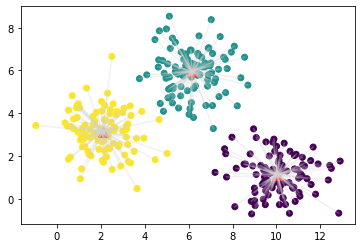

In [ ]:
nearest_indexes = kmeans.all_nearest_centroids(dataset, centroids)

# Plota os os cluster ------------------------------------------------
plt.scatter(dataset[:,0], dataset[:,1], c=nearest_indexes)

# Plota os centroids
plt.scatter(centroids[:,0], centroids[:,1], marker='^', c='red', s=100)
for index, centroid in enumerate(centroids):
    dataframe = dataset[nearest_indexes == index,:]
    for data in dataframe:
        plt.plot([centroid[0], data[0]], [centroid[1], data[1]], 
                 c='lightgray', alpha=0.3)
plt.show()

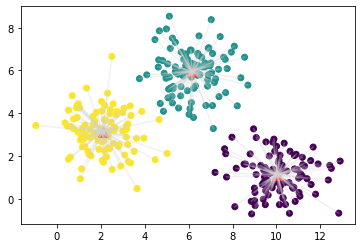

In [ ]:
centroids = kmeans.update_centroids(dataset, centroids, nearest_indexes)

nearest_indexes = kmeans.all_nearest_centroids(dataset, centroids)

# Plota os os cluster ------------------------------------------------
plt.scatter(dataset[:,0], dataset[:,1], c=nearest_indexes)

# Plota os centroids
plt.scatter(centroids[:,0], centroids[:,1], marker='^', c='red', s=100)
for index, centroid in enumerate(centroids):
    dataframe = dataset[nearest_indexes == index,:]
    for data in dataframe:
        plt.plot([centroid[0], data[0]], [centroid[1], data[1]], 
                 c='lightgray', alpha=0.3)
plt.show()